# Laboratório 3 - Regressão linear simples, múltipla e polinomial

## Caso 1 - regressão linear simples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro

Conjunto de dados de consumo e renda.

In [ ]:
Consumo = sm.datasets.get_rdataset("USConsump1993", "AER").data

Seprando 75% dos dados para treino do modelo.

In [ ]:
np.random.seed(3)
treino, teste = train_test_split(Consumo, test_size=0.25)

Obtendo um modelo de regressão linear simples para consumo em função da renda.

In [ ]:
X_train = sm.add_constant(treino['income'])
y_train = treino['expenditure']
lm1 = sm.OLS(y_train, X_train).fit()

Visualizando modelo com dados de treino.

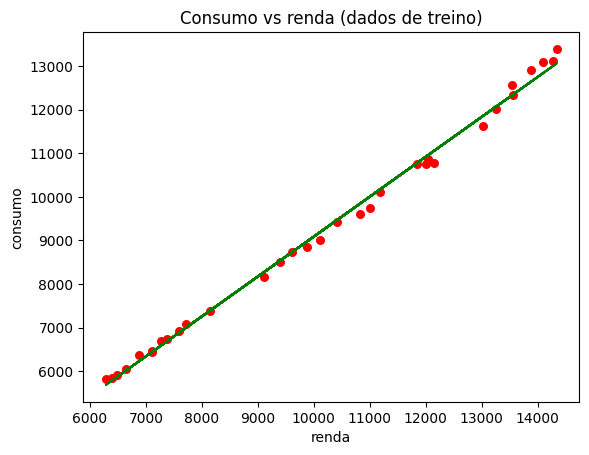

In [ ]:
plt.scatter(treino['income'], treino['expenditure'], color='red', s=30)
plt.plot(treino['income'], lm1.predict(X_train), color='green')
plt.title('Consumo vs renda (dados de treino)')
plt.xlabel('renda')
plt.ylabel('consumo')
plt.show()

Função de métricas de desempenho para avaliar o modelo.

In [ ]:
def metrics(obs, pred):
    RMSE = np.sqrt(mean_squared_error(obs, pred))
    MAE = mean_absolute_error(obs, pred)
    R2 = r2_score(obs, pred)
    return pd.DataFrame({'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]})

Avaliando o modelo considerando os dados de treino.

In [ ]:
X_test = sm.add_constant(teste['income'])
y_test = teste['expenditure']
metrics_train = metrics(y_train, lm1.predict(X_train))
print("Métricas para dados de treino:")
print(metrics_train)

Métricas para dados de treino:
         RMSE         MAE        R2
0  150.072411  116.575793  0.996315


Avaliando os resíduos do modelo.

In [ ]:
shapiro_test = shapiro(lm1.resid)
print("Teste de Shapiro-Wilk para resíduos:")
print(shapiro_test)

Teste de Shapiro-Wilk para resíduos:
ShapiroResult(statistic=0.972682774066925, pvalue=0.5577136874198914)


Utilizando o modelo para previsão com dados de teste e avaliando modelo com dados de teste.

In [ ]:
metrics_test = metrics(y_test, lm1.predict(X_test))
print("\nMétricas para dados de teste:")
print(metrics_test)


Métricas para dados de teste:
         RMSE         MAE        R2
0  150.170896  114.126053  0.996099


Plotando modelo com dados de teste.

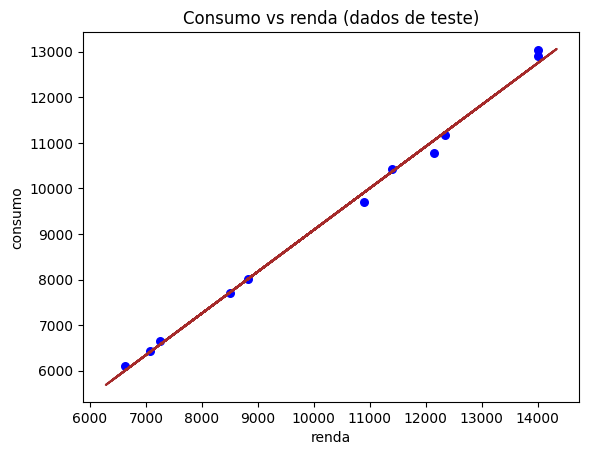

In [ ]:
plt.scatter(teste['income'], teste['expenditure'], color='blue', s=30)
plt.plot(treino['income'], lm1.predict(X_train), color='brown')
plt.title('Consumo vs renda (dados de teste)')
plt.xlabel('renda')
plt.ylabel('consumo')
plt.show()

## Regressão linear múltipla

Exemplo de dados macroeconômicos para regressão linear múltipla.

In [ ]:
longley = sm.datasets.get_rdataset("longley").data

É importante padronizar os dados para evitar efeitos de escala.

In [ ]:
longley_scaled = (longley - longley.mean()) / longley.std()

Dividindo dados de treino e teste.

In [ ]:
treino, teste = train_test_split(longley_scaled, test_size=0.2)

Regressão múltipla.

In [ ]:
X_train = sm.add_constant(treino.drop(columns=['Employed']))
y_train = treino['Employed']
lm_mult = sm.OLS(y_train, X_train).fit()

Avaliando o modelo considerando os dados de treino.

In [ ]:
metrics_train = metrics(y_train, lm_mult.predict(X_train))
print("\nMétricas para dados de treino (Regressão Linear Múltipla):")
print(metrics_train)


Métricas para dados de treino (Regressão Linear Múltipla):
       RMSE      MAE        R2
0  0.044177  0.03381  0.997251


Avaliando os resíduos do modelo.

In [ ]:
shapiro_test = shapiro(lm_mult.resid)
print("\nTeste de Shapiro-Wilk para resíduos (Regressão Linear Múltipla):")
print(shapiro_test)

Avaliando o modelo com dados de teste.

In [ ]:
X_test = sm.add_constant(teste.drop(columns=['Employed']))
y_test = teste['Employed']
metrics_test = metrics(y_test, lm_mult.predict(X_test))
print("\nMétricas para dados de teste (Regressão Linear Múltipla):")
print(metrics_test)



Métricas para dados de teste (Regressão Linear Múltipla):
       RMSE       MAE        R2
0  0.170245  0.165085  0.973886


Regressão múltipla com variáveis categóricas

In [ ]:
Grunfeld = sm.datasets.get_rdataset("Grunfeld", "plm").data

Visualizando dados.

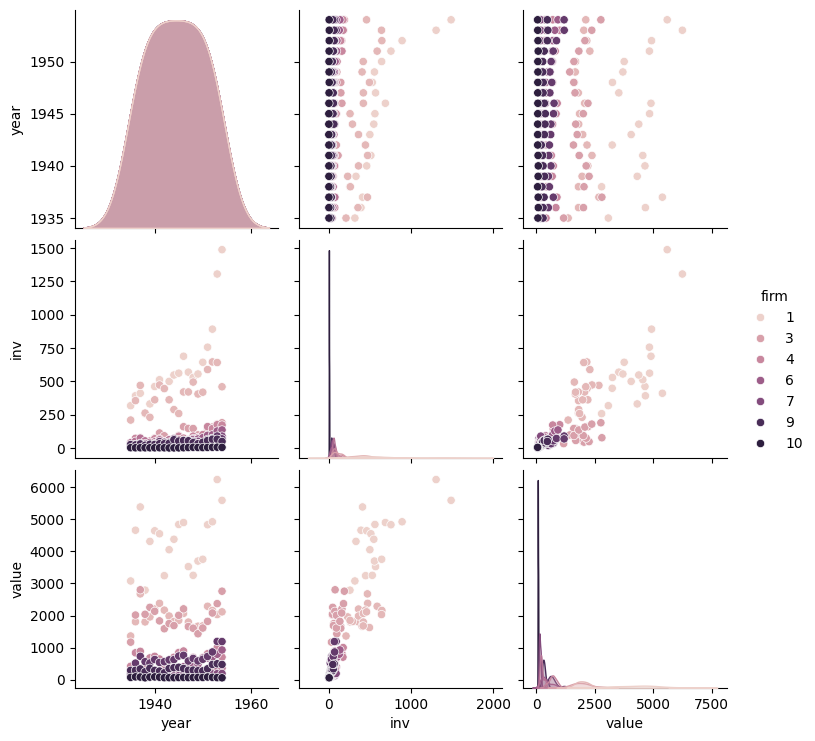

In [ ]:
sns.pairplot(Grunfeld.iloc[:, :4], hue='firm')
plt.show()

Codificando a variável 'firm' em variáveis binárias.

In [ ]:
Grunfeld2 = pd.get_dummies(Grunfeld, columns=['firm'], drop_first=True)

Padronizando variáveis regressoras contínuas.

In [ ]:
Grunfeld2.iloc[:, 1:4] = (Grunfeld2.iloc[:, 1:4] - Grunfeld2.iloc[:, 1:4].mean()) / Grunfeld2.iloc[:, 1:4].std()

Dividindo dados de treino e teste.

In [ ]:
treino, teste = train_test_split(Grunfeld2, test_size=0.2)

Modelo de regressão linear múltipla com variáveis contínuas e categóricas.

In [ ]:
X_train = sm.add_constant(treino.drop(columns=['inv']))
y_train = treino['inv']
lm_invest = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

 Avaliando o modelo considerando os dados de treino.

In [ ]:
metrics_train = metrics(y_train, lm_invest.predict(X_train))
print("\nMétricas para dados de treino (Regressão Linear Múltipla com Variáveis Categóricas):")
print(metrics_train)


Métricas para dados de treino (Regressão Linear Múltipla com Variáveis Categóricas):
       RMSE       MAE        R2
0  0.217826  0.139435  0.953365


Avaliando o modelo com dados de teste.

In [ ]:
X_test = sm.add_constant(teste.drop(columns=['inv']))
y_test = teste['inv']
metrics_test = metrics(y_test, lm_invest.predict(X_test))
print("\nMétricas para dados de teste (Regressão Linear Múltipla com Variáveis Categóricas):")
print(metrics_test)


Métricas para dados de teste (Regressão Linear Múltipla com Variáveis Categóricas):
      RMSE       MAE        R2
0  0.28533  0.187772  0.909169


## Regressão polinomial

Gerando dados para exemplo.

In [2]:
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2*X + 3*X**2 + np.random.normal(0, 5, 100)

Criando data frame para os dados.

In [4]:
data = pd.DataFrame({'X': X, 'y': y})

Dividindo os dados em conjunto de treino e teste

In [5]:
train_data = data.sample(frac=0.75, random_state=0)
test_data = data.drop(train_data.index)

Ajustando um modelo de regressão linear aos dados transformados.

In [6]:
lm1 = sm.OLS(train_data['y'], sm.add_constant(train_data['X'])).fit()

Estimando modelo quadrático.

In [7]:
lm2 = sm.OLS(train_data['y'], sm.add_constant(train_data[['X', 'X']]**2)).fit()

Avaliando o desempenho dos modelos nos dados de treinamento.

In [40]:
lm1_train_pred = lm1.predict(sm.add_constant(train_data['X']))
lm2_train_pred = lm2.predict(sm.add_constant(train_data[['X', 'X']]**2))

In [9]:
lm1_rmse_train = np.sqrt(mean_squared_error(train_data['y'], lm1_train_pred))
lm1_mae_train = mean_absolute_error(train_data['y'], lm1_train_pred)
lm1_r2_train = r2_score(train_data['y'], lm1_train_pred)

In [10]:
lm2_rmse_train = np.sqrt(mean_squared_error(train_data['y'], lm2_train_pred))
lm2_mae_train = mean_absolute_error(train_data['y'], lm2_train_pred)
lm2_r2_train = r2_score(train_data['y'], lm2_train_pred)

In [11]:
print("Desempenho para dados de treinamento:")
print("Modelo Linear:")
print("RMSE:", lm1_rmse_train)
print("MAE:", lm1_mae_train)
print("R^2:", lm1_r2_train)

Desempenho para dados de treinamento:
Modelo Linear:
RMSE: 26.556132173926198
MAE: 23.00808179662832
R^2: 0.9252454120165603


In [12]:
print("\nModelo Quadrático:")
print("RMSE:", lm2_rmse_train)
print("MAE:", lm2_mae_train)
print("R^2:", lm2_r2_train)


Modelo Quadrático:
RMSE: 4.533397465822434
MAE: 3.6358495551428467
R^2: 0.9978215088290819


PLotando resultados para dados de treino.

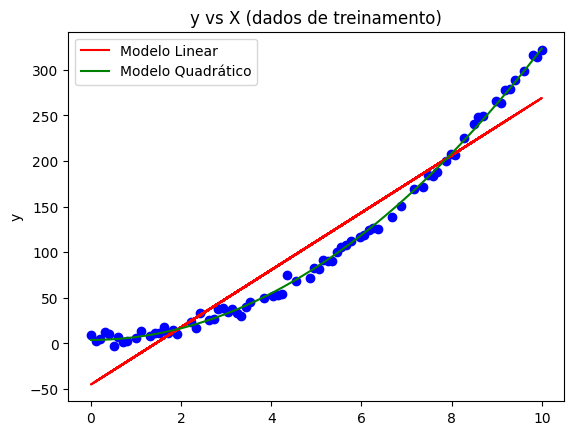

In [39]:
plt.scatter(train_data['X'], train_data['y'], color='blue')
plt.plot(train_data['X'], lm1_train_pred, color='red', label='Modelo Linear')
xgrid = np.linspace(0, 10, 50)
plt.plot(xgrid, lm2.predict(sm.add_constant(np.column_stack((xgrid,xgrid))**2)), color='green', label='Modelo Quadrático')
plt.ylabel('y')
plt.title('y vs X (dados de treinamento)')
plt.legend()
plt.show()

Avaliando o desempenho dos modelos nos dados de teste.

In [41]:
lm1_test_pred = lm1.predict(sm.add_constant(test_data['X']))
lm2_test_pred = lm2.predict(sm.add_constant(test_data[['X', 'X']]**2))

In [42]:
lm1_rmse_test = np.sqrt(mean_squared_error(test_data['y'], lm1_test_pred))
lm1_mae_test = mean_absolute_error(test_data['y'], lm1_test_pred)
lm1_r2_test = r2_score(test_data['y'], lm1_test_pred)

In [43]:
lm2_rmse_test = np.sqrt(mean_squared_error(test_data['y'], lm2_test_pred))
lm2_mae_test = mean_absolute_error(test_data['y'], lm2_test_pred)
lm2_r2_test = r2_score(test_data['y'], lm2_test_pred)

In [45]:
print("Desempenho para dados de teste:")
print("Modelo Linear:")
print("RMSE:", lm1_rmse_test)
print("MAE:", lm1_mae_test)
print("R^2:", lm1_r2_test)

Desempenho para dados de teste:
Modelo Linear:
RMSE: 20.951552137443993
MAE: 18.252124787327276
R^2: 0.9472623521463119


In [44]:
print("Modelo quadrático:")
print("RMSE:", lm2_rmse_test)
print("MAE:", lm2_mae_test)
print("R^2:", lm2_r2_test)

Modelo quadrático:
RMSE: 4.533397465822434
MAE: 3.6358495551428467
R^2: 0.9978215088290819


Plotando resultados para dados de teste.

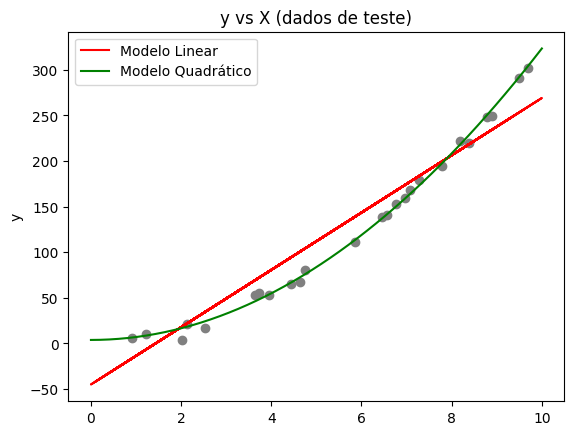

In [46]:
plt.scatter(test_data['X'], test_data['y'], color='gray')
plt.plot(train_data['X'], lm1_train_pred, color='red', label='Modelo Linear')
plt.plot(xgrid, lm2.predict(sm.add_constant(np.column_stack((xgrid,xgrid))**2)), color='green', label='Modelo Quadrático')
plt.ylabel('y')
plt.title('y vs X (dados de teste)')
plt.legend()
plt.show()